# I - Introduction

# II - Prepare required frameworks

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier as GBC
import lightgbm as lgbm
from sklearn.feature_selection import mutual_info_classif
from scipy import stats

In [40]:
import warnings

# Ẩn tất cả các cảnh báo
warnings.filterwarnings('ignore')

In [41]:
# from sklearnex import patch_sklearn

In [42]:
# patch_sklearn()

# III - Prepare dataset

# 1. Load dataset

In [79]:
dataset = pd.read_excel('./Dry_Bean_Dataset.xlsx')

In [44]:
# dataset.info()

In [45]:
# dataset.duplicated().sum()

In [80]:
dataset = dataset.set_index('Bean ID')

In [47]:
dataset.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [81]:
features = dataset.columns[:-1]
target = dataset.columns[-1]

In [49]:
# x.describe()

In [82]:
x = dataset[features]
y = dataset[target]

In [83]:
scaler = StandardScaler()
encoder = LabelEncoder()

In [52]:
# dataset['Class'] = pd.DataFrame(encoder.fit_transform(dataset['Class']), columns=['Class'])

In [100]:
pd.DataFrame(encoder.fit_transform(dataset['Class']), columns=['Class']).value_counts()

Class
3        3546
6        2636
5        2027
4        1928
2        1630
0        1322
1         522
Name: count, dtype: int64

In [53]:
# dataset['Class'].value_counts()

In [54]:
def prepare_data(dataset, features, target, scaler, encoder):
    x = dataset[features]
    y = dataset[target]
    x_scaled = scaler.fit_transform(x)
    y_encoded = encoder.fit_transform(y)
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_encoded, test_size=0.2, random_state=20)
    return x_train, x_test, y_train, y_test

In [55]:
x_train, x_test, y_train, y_test = prepare_data(dataset, features, target, scaler, encoder)

# Training models

In [56]:
models = {
    "KNeighbors": KNC(),
    "LogisticRegression": LR(),
    "RandomForest": RFC(),
    "SVC": SVC(),
    # "GradientBoosting": GBC(),
    "LightGBM": lgbm.LGBMClassifier(verbose=-1)
}

def get_scores(models, xtrain, ytrain, xtest, ytest):
    for name, model in models.items():
        print(f"-----> {name}")
        model.fit(xtrain, ytrain)
        ypred = model.predict(xtest)
        model.score(xtest, ytest)
        print("---> Model score: ", model.score(xtest, ytest))
        reports = classification_report(ytest, ypred)
        print("---> Classification_reports: \n", reports)
        
        # scores = np.mean(cross_val_score(model, xtrain, ytrain, cv=5))
        # print("---> Cross-validation scores: \n", scores)
        print("============================================\n")

In [57]:
get_scores(models, x_train, y_train, x_test, y_test)

-----> KNeighbors
---> Model score:  0.9214102093279471
---> Classification_reports: 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       279
           1       1.00      1.00      1.00       103
           2       0.93      0.95      0.94       332
           3       0.91      0.93      0.92       714
           4       0.94      0.95      0.95       341
           5       0.96      0.93      0.94       427
           6       0.86      0.88      0.87       527

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723


-----> LogisticRegression
---> Model score:  0.9243481454278369
---> Classification_reports: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       279
           1       1.00      1.00      1.00       103
           2       0.94      0.95      0.95       332
   

# EDA

# Các thuộc tính
Area (A)	Diện tích:	Diện tích vùng của hạt đậu và số pixel nằm trong ranh giới của nó.

Perimeter (P)	Chu vi:	Chu vi của hạt đậu được định nghĩa là độ dài của đường viền.

Major axis length (L)	Độ dài trục chính:	Khoảng cách giữa hai đầu của đường thẳng dài nhất có thể vẽ trên hạt đậu.

Minor axis length (l)	Độ dài trục phụ:	Đường thẳng dài nhất có thể vẽ trên hạt đậu theo hướng vuông góc với trục chính.

Aspect ratio (K)	Tỷ lệ dài rộng:	Xác định mối quan hệ giữa L và l.

Eccentricity (Ec)	Độ lệch tâm:	Độ lệch tâm của hình elip có cùng các mô men như vùng hạt đậu.

Convex area (C)	Diện tích lồi:	Số pixel trong đa giác lồi nhỏ nhất có thể chứa diện tích của hạt đậu.

Equivalent diameter (Ed)	Đường kính tương đương:	Đường kính của một hình tròn có cùng diện tích với diện tích của hạt đậu.

Extent (Ex)	Độ bao phủ:	Tỷ lệ giữa số pixel trong khung bao và diện tích của hạt đậu.

Solidity (S)	Độ đặc:	Còn được gọi là độ lồi. Tỷ lệ giữa số pixel trong vỏ lồi và số pixel tìm thấy trong hạt đậu.

Roundness (R)	Độ tròn:	Được tính toán bằng công thức: (4piA)/(P^2)

Compactness (CO)	Độ gọn:	Đo độ tròn của một vật thể: Ed/L

ShapeFactor1 (SF1)	Hệ số hình dạng 1:	Tham số hình dạng bổ sung.

ShapeFactor2 (SF2)	Hệ số hình dạng 2:	Tham số hình dạng bổ sung.

ShapeFactor3 (SF3)	Hệ số hình dạng 3:	Tham số hình dạng bổ sung.

ShapeFactor4 (SF4)	Hệ số hình dạng 4:	Tham số hình dạng bổ sung.

Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)	Lớp	Thuộc tính này phân loại hạt đậu thành các loại khác nhau: Seker, Barbunya, Bombay, Cali, Dermosan, Horoz và Sira.


<Axes: xlabel='Types of bean', ylabel='Count'>

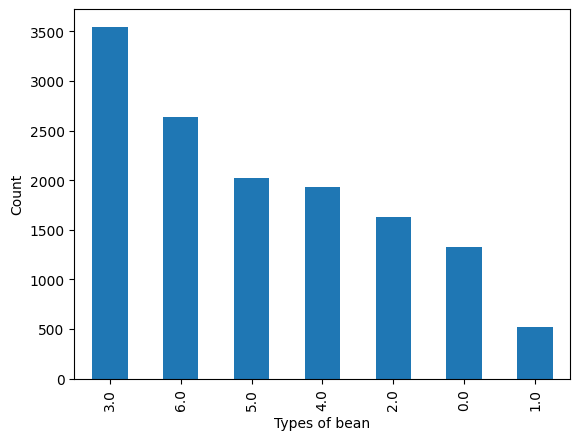

In [58]:
dataset['Class'].value_counts().plot(kind='bar', xlabel='Types of bean', ylabel='Count')

### Drop outliner

In [59]:
data_heads = x.columns
data_heads

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [60]:
# # Biều đồ hist thêm đường trung vị
# fig, axes = plt.subplots(4,4, figsize = (24,24))
# for i, axe in enumerate(axes.flatten()):
#     sns.histplot(data = x[data_heads[i]], ax = axe)
#     median = x[data_heads[i]].median()
#     axe.set_title(f'{data_heads[i]} (Median = {median:0.1f})')
#     axe.axvline(median, color='red', lw=2, alpha=1)

In [61]:
# # Biều đồ Boxplot để xem nhiễu
# fig, axes = plt.subplots(4, 4, figsize=(24,24))
# for i,axe in enumerate(axes.flatten()):
#     sns.boxplot(data = x[data_heads[i]], ax = axe)
#     axe.set_title(f'{data_heads[i]}')
# plt.tight_layout()

In [62]:
# fig, axes = plt.subplots(8, 2, figsize=(24,48))
# for feature, ax in zip(x.columns, axes.flatten()):
#     sns.violinplot(data = dataset, x = 'Class', y = feature, ax = ax, inner="quartile" )
#     ax.set(xlabel = None)
#     ax.set_title(f'Phân bố {feature} từng loại')

In [63]:
def drop_outliers(dataset, features):
    # Tính toán Z-score cho mỗi điểm dữ liệu
    z_scores = stats.zscore(dataset[features])

    # Xác định ngưỡng cho Z-score
    threshold = 3

    # Loại bỏ các outlier
    dataset_cleaned = dataset.loc[(z_scores < threshold).all(axis=1)]

    # In ra số lượng outlier đã loại bỏ
    outliers_removed = dataset.shape[0] - dataset_cleaned.shape[0]
    print("Số lượng outlier đã loại bỏ:", outliers_removed)
    return dataset_cleaned

In [64]:
dataset_cleaned = drop_outliers(dataset, features)
x_train, x_test, y_train, y_test = prepare_data(dataset_cleaned, features, target, scaler, encoder)
get_scores(models, x_train, y_train, x_test, y_test)

Số lượng outlier đã loại bỏ: 537
-----> KNeighbors
---> Model score:  0.9116634799235181
---> Classification_reports: 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       275
           1       1.00      1.00      1.00         3
           2       0.93      0.94      0.93       344
           3       0.91      0.90      0.91       697
           4       0.94      0.94      0.94       359
           5       0.95      0.94      0.94       408
           6       0.84      0.88      0.86       529

    accuracy                           0.91      2615
   macro avg       0.93      0.93      0.93      2615
weighted avg       0.91      0.91      0.91      2615


-----> LogisticRegression
---> Model score:  0.9170172084130019
---> Classification_reports: 
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       275
           1       1.00      1.00      1.00         3
           2       0.95 

### Drop large corr

In [65]:
# # correlation matrix
# plt.figure(figsize=(20,20))
# sns.heatmap(x.corr(),annot = True, cmap = 'viridis_r', fmt = '.2f');

In [66]:
def drop_corr(dataset, features):
    # Đọc dữ liệu từ file CSV hoặc tạo ma trận tương quan từ dữ liệu hiện có
    corr_matrix = dataset[features].corr().abs()

    # Chọn ngưỡng tương quan
    threshold = 0.8

    # Tạo một bản sao của ma trận tương quan
    mask = corr_matrix.copy()

    # Thiết lập giá trị True cho các ô phía trên đường chéo chính
    # mask[np.triu_indices_from(mask.values)] = 0

    for i in range(len(mask.columns)):
        for j in range(i + 1):
            mask.iloc[i,j] = 0

    # print(mask)
    # Loại bỏ các biến dựa trên ngưỡng tương quan
    drop_cols = [column for column in mask.columns if any(mask[column] > threshold)]

    # Loại bỏ các cột từ DataFrame
    dataset_filtered = dataset.drop(drop_cols, axis=1)
    return dataset_filtered

In [67]:
dataset_filtered = drop_corr(dataset_cleaned, features)

In [68]:
x_train, x_test, y_train, y_test = prepare_data(dataset_filtered, dataset_filtered.columns[:-1], dataset_filtered.columns[-1], scaler, encoder)

In [69]:
get_scores(models, x_train, y_train, x_test, y_test)

-----> KNeighbors
---> Model score:  0.9105162523900574
---> Classification_reports: 
               precision    recall  f1-score   support

           0       0.95      0.87      0.91       275
           1       1.00      1.00      1.00         3
           2       0.92      0.95      0.93       344
           3       0.91      0.90      0.91       697
           4       0.95      0.95      0.95       359
           5       0.95      0.93      0.94       408
           6       0.83      0.88      0.85       529

    accuracy                           0.91      2615
   macro avg       0.93      0.93      0.93      2615
weighted avg       0.91      0.91      0.91      2615


-----> LogisticRegression
---> Model score:  0.9158699808795411
---> Classification_reports: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       275
           1       1.00      1.00      1.00         3
           2       0.95      0.93      0.94       344
   

In [70]:
# Strongly_corr_features = dataset[["Area","Perimeter","AspectRation","Eccentricity","roundness","Compactness","Class"]]
# Strongly_corr_features.head()
# sns.set_theme(style="whitegrid")
# sns.pairplot(Strongly_corr_features, hue="Class")

In [71]:
dataset.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [72]:
mi_scores = mutual_info_classif(x, y, random_state = 31)
mi_scores_df = pd.DataFrame({'Feature': x.columns, 'MI Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False).reset_index(drop=True)

# plt.figure(figsize=(20,10))
# sns.barplot(x='MI Score', y='Feature', data=mi_scores_df) 
# plt.xlabel('Mutual Information Score')
# # plt.ylabel('Feature')
# plt.title('Mutual Information Scores for Each Feature')
# # plt.gca().invert_yaxis() # sắp xếp lại theo giảm dần
# plt.show()

### Drop large corr and outliner

In [73]:
data = drop_corr(dataset_cleaned, features)
x_train, x_test, y_train, y_test = prepare_data(data, data.columns[:-1], data.columns[-1], scaler, encoder)
get_scores(models, x_train, y_train, x_test, y_test)

-----> KNeighbors
---> Model score:  0.9105162523900574
---> Classification_reports: 
               precision    recall  f1-score   support

           0       0.95      0.87      0.91       275
           1       1.00      1.00      1.00         3
           2       0.92      0.95      0.93       344
           3       0.91      0.90      0.91       697
           4       0.95      0.95      0.95       359
           5       0.95      0.93      0.94       408
           6       0.83      0.88      0.85       529

    accuracy                           0.91      2615
   macro avg       0.93      0.93      0.93      2615
weighted avg       0.91      0.91      0.91      2615


-----> LogisticRegression
---> Model score:  0.9158699808795411
---> Classification_reports: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       275
           1       1.00      1.00      1.00         3
           2       0.95      0.93      0.94       344
   

# * Data augmentation

## ** SMOTE

In [74]:
! pip install imbalanced-learn


In [75]:
from imblearn.over_sampling import SMOTE

In [85]:
x_train, x_test, y_train, y_test = prepare_data(dataset, dataset.columns[:-1], dataset.columns[-1], scaler, encoder)

In [86]:
x_train.shape

(10888, 16)

In [87]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# for i in range(4):
#     x_train_resampled, y_train_resampled = smote.fit_resample(x_train_resampled, y_train_resampled)
print(x_train_resampled.shape)    
print(y_train_resampled.shape)

get_scores(models, x_train_resampled, y_train_resampled, x_test, y_test)

(19824, 16)
(19824,)
-----> KNeighbors
---> Model score:  0.9192067572530297
---> Classification_reports: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       279
           1       1.00      1.00      1.00       103
           2       0.94      0.94      0.94       332
           3       0.93      0.91      0.92       714
           4       0.93      0.95      0.94       342
           5       0.94      0.94      0.94       427
           6       0.85      0.88      0.87       526

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723


-----> LogisticRegression
---> Model score:  0.9225119353654058
---> Classification_reports: 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       279
           1       1.00      1.00      1.00       103
           2       0.93      0.95   

In [ ]:
pd.DataFrame(y_train).value_counts()

## ** Feature perturbation

In [183]:
x = dataset[features]
y = dataset[target]

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [185]:
x_train.shape

(10888, 16)

In [186]:
traindf = pd.DataFrame(x_train, columns=features)
traindf['Class'] = y_train

In [189]:
countdf = traindf['Class'].value_counts()
for i in countdf.index:
    countdf[i] = 7123 / countdf[i]
countdf

Class
DERMASON     2.515184
SIRA         3.375829
SEKER        4.451875
HOROZ        4.491173
CALI         5.487673
BARBUNYA     6.829338
BOMBAY      17.000000
Name: count, dtype: float64

In [192]:
# Hàm để thêm nhiễu Gaussian
def add_gaussian_noise(series, mean=0, std_dev=0.1):
    noise = np.random.normal(mean, std_dev, series.shape)
    return series + noise

df1 = traindf.loc[traindf['Class'] == 'DERMASON']
df2 = traindf.loc[traindf['Class'] == 'SIRA']
df3 = traindf.loc[traindf['Class'] == 'SEKER']
df4 = traindf.loc[traindf['Class'] == 'HOROZ']
df5 = traindf.loc[traindf['Class'] == 'CALI']
df6 = traindf.loc[traindf['Class'] == 'BARBUNYA']
df7 = traindf.loc[traindf['Class'] == 'BOMBAY']


In [193]:
def add_noise(df):
    for column in df.columns:
        if column != 'Class':
            df[column] = add_gaussian_noise(df[column])
    return df

In [194]:
for i in countdf.index:
    if i == 'DERMASON':
        cp = df1.copy()
        for j in range(round(countdf[i]) - 2):
            df1 = pd.concat([df1, add_noise(cp)])
    elif i == 'SIRA':
        cp = df2.copy()
        for j in range(round(countdf[i]) - 2):
            df2 = pd.concat([df2, add_noise(cp)])
    elif i == 'SEKER':
        cp = df3.copy()
        for j in range(round(countdf[i]) - 2):
            df3 = pd.concat([df3, add_noise(cp)])
    elif i == 'HOROZ':
        cp = df4.copy()
        for j in range(round(countdf[i]) - 2):
            df4 = pd.concat([df4, add_noise(cp)])
    elif i == 'CALI':
        cp = df5.copy()
        for j in range(round(countdf[i]) - 2):
            df5 = pd.concat([df5, add_noise(cp)])
    elif i == 'BARBUNYA':
        cp = df6.copy()
        for j in range(round(countdf[i]) - 2):
            df6 = pd.concat([df6, add_noise(cp)])
    elif i == 'BOMBAY':
        cp = df7.copy()
        for j in range(round(countdf[i]) - 2):
            df7 = pd.concat([df7, add_noise(cp)])


In [195]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7])

In [196]:
df.shape

(37596, 17)

In [197]:
df['Class'].value_counts()

Class
BOMBAY      6704
BARBUNYA    6258
DERMASON    5664
CALI        5192
SEKER       4800
HOROZ       4758
SIRA        4220
Name: count, dtype: int64

In [198]:
fp_data = pd.concat([traindf, df], axis=0)

In [199]:
fp_data.shape

(48484, 17)

In [200]:
fp_data['Class'].value_counts()

Class
DERMASON    8496
BARBUNYA    7301
BOMBAY      7123
CALI        6490
SEKER       6400
HOROZ       6344
SIRA        6330
Name: count, dtype: int64

In [201]:
fp_x_train, fp_x_test, fp_y_train, fp_y_test = prepare_data(fp_data, fp_data.columns[:-1], fp_data.columns[-1], scaler, encoder)

In [202]:
get_scores(models, fp_x_train, fp_y_train, fp_x_test, fp_y_test)

-----> KNeighbors
---> Model score:  0.868825409920594
---> Classification_reports: 
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      1406
           1       1.00      1.00      1.00      1411
           2       0.78      0.80      0.79      1333
           3       0.85      0.90      0.88      1709
           4       0.92      0.91      0.92      1294
           5       0.90      0.88      0.89      1270
           6       0.82      0.78      0.80      1274

    accuracy                           0.87      9697
   macro avg       0.87      0.87      0.87      9697
weighted avg       0.87      0.87      0.87      9697


-----> LogisticRegression
---> Model score:  0.9194596266886665
---> Classification_reports: 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      1406
           1       1.00      1.00      1.00      1411
           2       0.90      0.92      0.91      1333
    

## ** Synthetic data generation

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
# Chuẩn bị dữ liệu cho mô hình GMM
X = df_encoded.drop(columns=['Label']).values
y = df_encoded['Label'].values

# Khởi tạo và huấn luyện mô hình Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

# Sinh dữ liệu mới từ mô hình GMM
num_samples = 10  # Số lượng mẫu mới cần tạo
X_synthetic = gmm.sample(num_samples)[0]

# Chuyển đổi dữ liệu sinh ngược lại thành DataFrame
df_synthetic = pd.DataFrame(X_synthetic, columns=df_encoded.drop(columns=['Label']).columns)

# Đảo ngược quá trình encoding để có các đặc trưng phân loại
df_synthetic['Type1'] = (df_synthetic[[col for col in df_synthetic if col.startswith('Type_Type1')]] == 1).astype(int)
df_synthetic['Type2'] = (df_synthetic[[col for col in df_synthetic if col.startswith('Type_Type2')]] == 1).astype(int)
df_synthetic['Type3'] = (df_synthetic[[col for col in df_synthetic if col.startswith('Type_Type3')]] == 1).astype(int)

# Loại bỏ các cột encoding
df_synthetic = df_synthetic.drop(columns=[col for col in df_synthetic if col.startswith('Type_')])

# Thêm nhãn giả lập (hoặc có thể sử dụng một mô hình để dự đoán nhãn)
df_synthetic['Label'] = np.random.choice([0, 1], size=num_samples)

print("\nDữ liệu sinh từ GMM:")
print(df_synthetic)